In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [3]:
sns.set()

In [4]:
df = pd.read_csv('../topic1_panda_data_analysis/telecom_churn.csv')

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
# Churn is the target variable (last column)

## Univariate visualization
- Looks at one feature at a time. 
- Distribution of the values of the feature 

#### Quantitative features

In [8]:
feat = ['total day minutes', 'total intl calls']

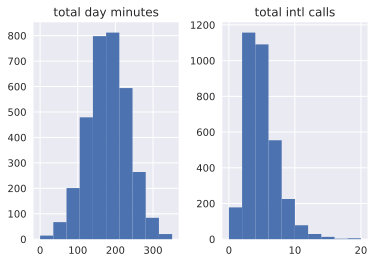

In [9]:
# Histogram groups the values into bins or equal value range. 
# The shape of histogram can tell about the distribution type of the data.
df[feat].hist();

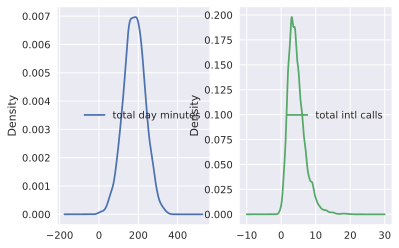

In [10]:
# kernel density plots
# similar to hist but a smoother version
# doesn't depend on the size of the bin

# df[:-1].plot(kind='density', sharex=False, subplots=True, layout=(10,2), figsize=(10,20))

df[feat].plot(kind='density', sharex=False, subplots=True, 
              layout=(1,2), figsize=(6,4));

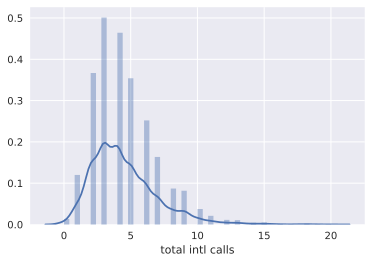

In [11]:
# seaborn distplot
# can be seen as a combination of hist and kde

sns.distplot(df['total intl calls']);

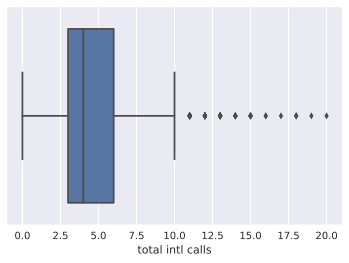

In [12]:
# boxplot 
# length of the box given by Q1 and Q3 percentiles
# vertical line inside box tells the median
# whiskers - length given by (Q1-1.5*IQR, Q3-1.5*IQR)

# seaborn boxplot
sns.boxplot(x='total intl calls', data=df);

# matplotlib boxplot
#plt.boxplot(df['total intl calls']);

# pandas boxplot
#df.boxplot('total intl calls');

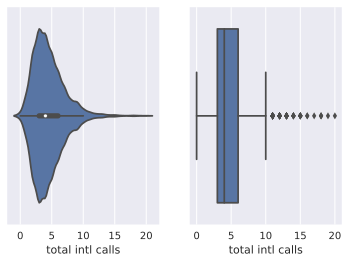

In [13]:
# violin plot
# looks like a kernel density plot on both sides of the axis

_, axes = plt.subplots(1, 2, sharey=True)
sns.boxplot('total intl calls', data=df, ax=axes[1]);
sns.violinplot('total intl calls', data=df, ax=axes[0]);

#### Categorical features

In [14]:
# frequency table
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

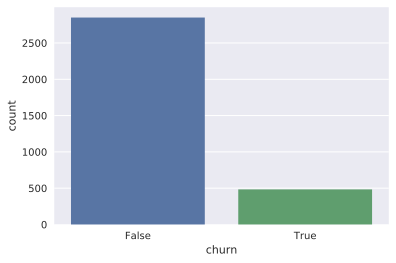

In [15]:
# bar plot
# hist used for numerical data, while bar used for categorical

_, axes = plt.subplots(ncols=1, nrows=1)
sns.countplot('churn', data=df, ax=axes)

## Multivariate features
- Helps visualize relation between 2 and more different variables


#### Correlation matrix
This information is useful in case we are using an ML algo that cannot work well with highly correlated features.

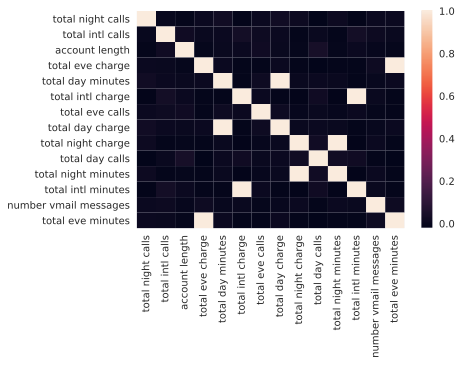

In [16]:
# drop the non numerical features
numerical = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan',
                                       'area code', 'phone number', 'churn', 'customer service calls']))
corr_mat = df[numerical].corr()
sns.heatmap(corr_mat);

# the white boxes tell which of the features are more correlated than others
# we can remove them

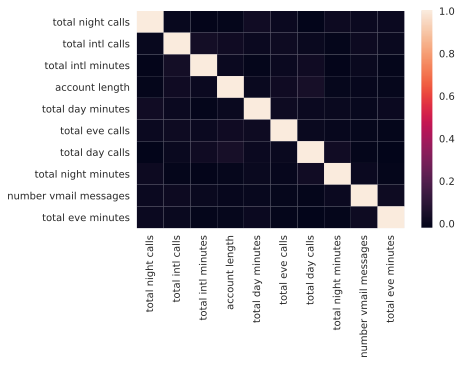

In [17]:
numerical = list(set(numerical) - set(['total day charge', 'total intl charge', 'total night charge', 'total eve charge']))

# lets see the new matrix
corr_mat = df[numerical].corr()
sns.heatmap(corr_mat);

#### Scatter plot
- shows values of two features as cartesian coordinates in 2d space.

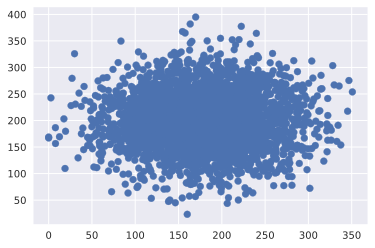

In [18]:
plt.scatter(x=df['total day minutes'], y=df['total night minutes']);

# ellipse shape means uncorrelated features

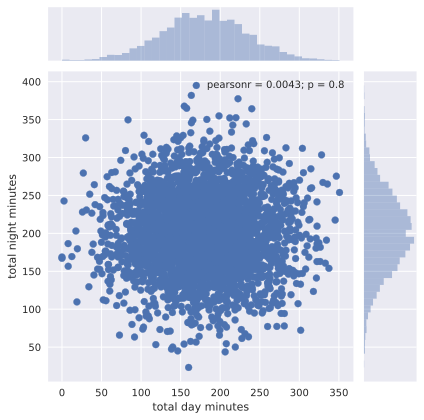

In [19]:
# using sns for scatter plot (little fancy)
sns.jointplot('total day minutes', 'total night minutes', df, 'scatter');

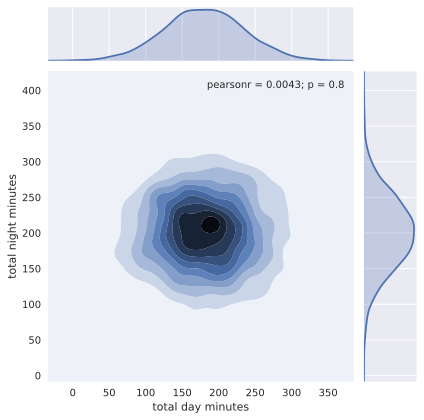

In [20]:
# bivariate version of kde
sns.jointplot('total day minutes', 'total night minutes', df, 'kde');

#### Scatterplot matrix
- Diagonal has the distribution of that feature
- other positions tell the scatterplot

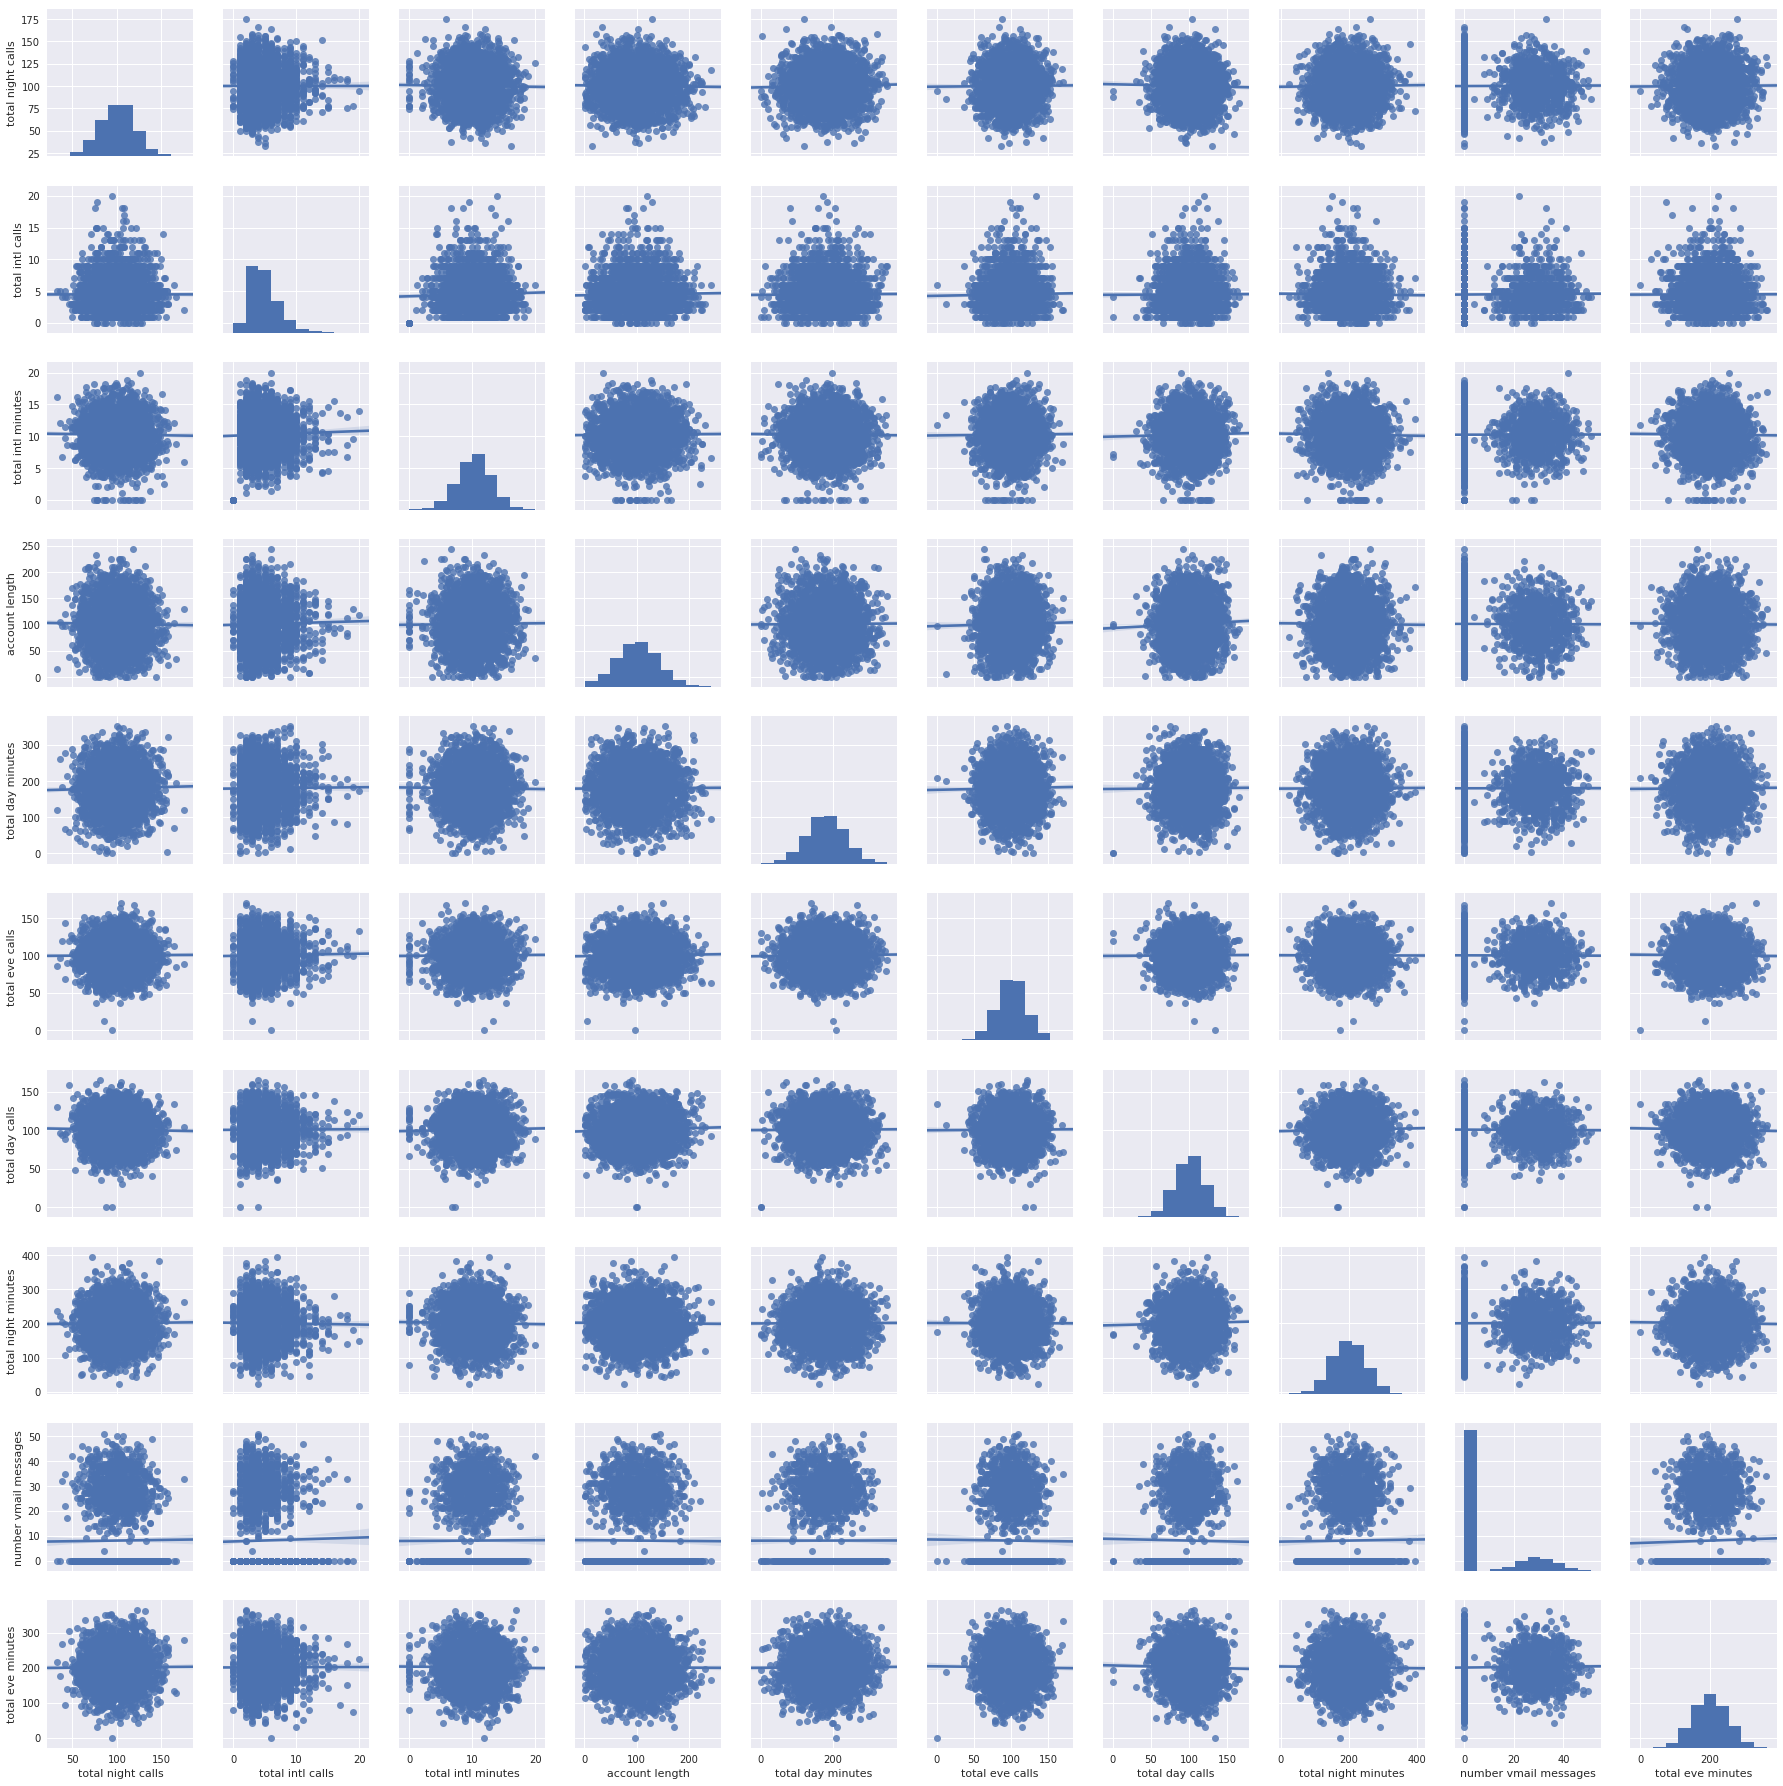

In [21]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical], kind='reg');

In [22]:
%config InlineBackend.figure_format = 'svg'

#### Quantitative–Categorical
- to see interaction between numerical and categorical features
- to see how the input variables are related with the output target

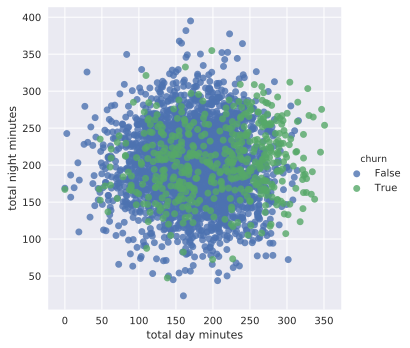

In [23]:
sns.lmplot('total day minutes', 'total night minutes', df, 
           hue='churn', fit_reg=False);

# looks like people who have high number of calls in the day as well 
# as in night are disloyal.

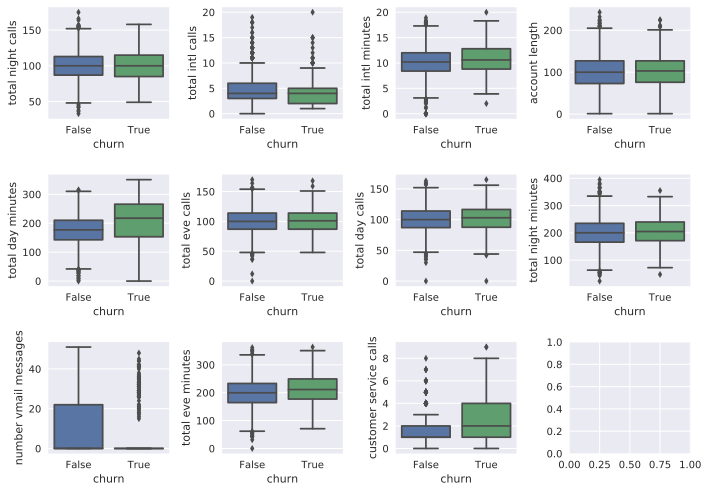

In [24]:
numerical.append('customer service calls')

%config InlineBackend.figure_format = 'png'

fig, axes = plt.subplots(3, 4, figsize=(10,7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot('churn', feat, data=df, ax=ax)
    ax.set_ylabel(feat)
fig.tight_layout();
%config InlineBackend.figure_format = 'svg'

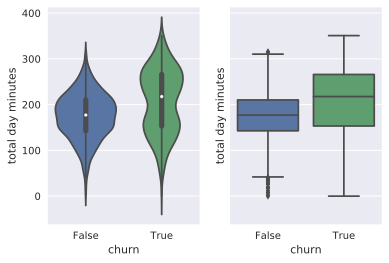

In [25]:
_, axes = plt.subplots(1, 2, sharey=True)
sns.violinplot('churn', 'total day minutes', data=df, ax=axes[0])
sns.boxplot('churn', 'total day minutes', data=df, ax=axes[1])

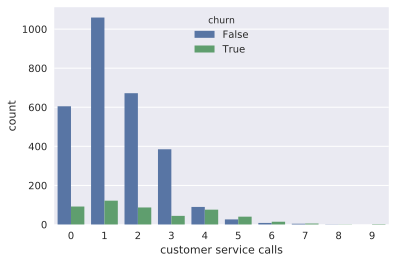

In [26]:
# customer service calls relation with churn
sns.countplot('customer service calls', hue='churn', data=df);

# churn rate increasing after a certain number of service calls

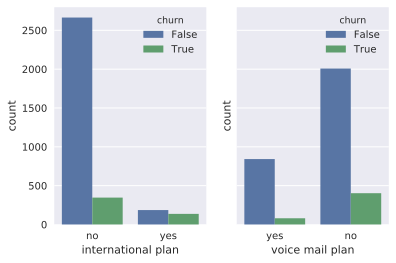

In [27]:
# relation between churn and features, international plan and voice mail plan
_, axes = plt.subplots(1, 2, sharey=True)

sns.countplot('international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot('voice mail plan', hue='churn', data=df, ax=axes[1]);

# more churn rate with high international plan

#### Contigency table
Provides multivariate frequency distribution of categorical value in tabular form.

In [28]:
# see how churn rate is related to each state
pd.crosstab(df.state, df.churn).T

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [29]:
# calculating churn rate for each state
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## Working on the whole dataset

#### t-SNE 
- t-distributed Stohastic Neighbor Embedding
- project the features on a plane such that the points which were far apart in the original space are still far apart in the new space and vice versa.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [31]:
x = df.drop(['churn', 'state', 'phone number'], axis=1)
x['international plan'] = x['international plan'].map({'yes': 1, 'no': 0})
x['voice mail plan'] = x['voice mail plan'].map({'yes': 1, 'no': 0})

In [32]:
x.head()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dtypes: float64(8), int64(10)
memory usage: 468.8

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
tsne = TSNE()
tsne_repr = tsne.fit_transform(x_scaled)

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['churn'].map({True: 'orange', False : 'blue'}), alpha=0.4); 

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True)
for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df[name].map({'yes': 'orange', 'no' : 'blue'}), alpha=0.4)
    axes[i].set_title(name)

# many dissatisfied customers are clustered in one region (yellow)